In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(rc={'figure.figsize':(8,10)})
#plt.rcParams['figure.figsize']= (5,5)

In [2]:
#!pip install plotly
#!pip install cufflinks
from plotly import __version__
print(__version__)
import cufflinks as cv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cv.go_offline()
#pd.DataFrame(new_value).iplot(kind='surface',)

5.3.1


In [3]:
import sys
sys.setrecursionlimit(4000)   #2000
print(sys.getrecursionlimit())

4000


In [4]:
size = 1000
width= 20

# Demo

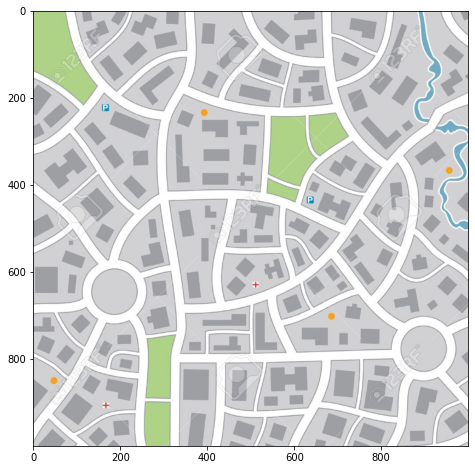

In [5]:
img = cv2.imread("img4.jpg")[:size,:size,:]     # 4 best
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

(1000, 1000, 3)


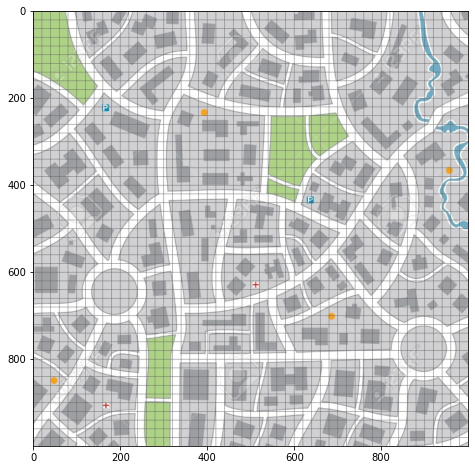

In [6]:
# colored image
img = cv2.imread("img4.jpg")     # 4 best
img = img[:size,:size,:3]
print(img.shape)
x,y,z = img.shape
for i in range(0,y,width):
    cv2.line(img,(i,0),(i,y), (100,100,100),1)
for j in range(0,x,width):
    cv2.line(img,(0,j),(y,j), (100,100,100),1)
"""
while True:   
    cv2.imshow("window", img)
    if cv2.waitKey(0) == 27:
        break
cv2.destroyAllWindows()
"""

cv2.imwrite('grid2_1000.jpg',img) #to save mean image
temp = cv2.imread("grid2_1000.jpg")
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))

In [7]:
# Edit

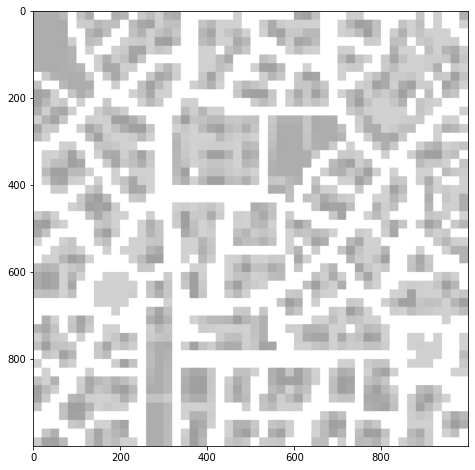

In [8]:
img = cv2.imread("img4.jpg")[:size,:size,:]
mean_img = img.copy()
img_transition_value = np.zeros((size//width,size//width))
for i in range(0,size,width):
    for j in range(0,size,width):
        # got all the points
        pixel_value = np.mean(img[i:i+width,j:j+width,:])
        if pixel_value >210:              #200 didn't work
            mean_img[i:i+width,j:j+width,:] = 255
        else:
            mean_img[i:i+width,j:j+width,:] = pixel_value
        #print(i,j)
cv2.imwrite('mean2_1000.jpg',mean_img) #to save mean image
temp = cv2.imread("mean2_1000.jpg")
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))

In [9]:
# kernel = np.ones((5,5), np.uint8)  # check how is better with or without dialation
# img_dilation = cv2.dilate(mean_img, kernel, iterations=1)
img_dilation = mean_img.copy()

In [10]:
cv2.imwrite("dilated_5.jpg",img_dilation)

True

In [11]:
img_dilation.shape

(1000, 1000, 3)

C:\Users\aman raj\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

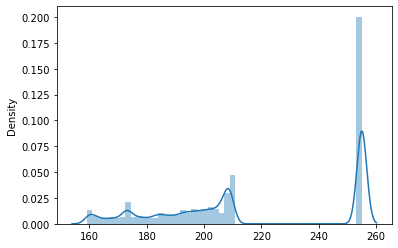

In [12]:
sns.distplot(img_dilation)

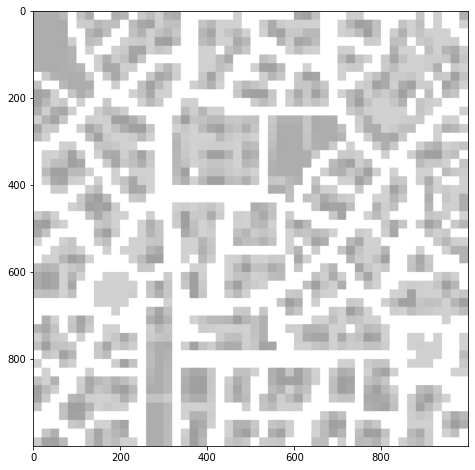

In [13]:
img_transition_value=np.where(img_dilation<230,0,255) # 230
cv2.imwrite("dilated_5_2.jpg",img_transition_value)

tmp = cv2.imread('dilated_5_2.jpg')
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))

In [14]:
img_transition_value=(img_transition_value[::width,::width,0]).copy()

In [15]:
img_transition_value

array([[  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ..., 255, 255, 255]])

C:\Users\aman raj\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

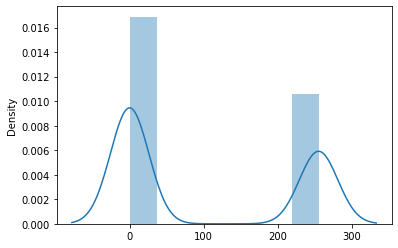

In [16]:
sns.distplot(img_transition_value)

In [17]:
img_transition_value=np.where(img_transition_value<120,-100,-1) # 230

In [18]:
img_transition_value

array([[-100, -100, -100, ...,   -1,   -1, -100],
       [-100, -100, -100, ...,   -1,   -1, -100],
       [-100, -100, -100, ..., -100,   -1,   -1],
       ...,
       [  -1,   -1,   -1, ..., -100, -100, -100],
       [  -1, -100, -100, ..., -100, -100,   -1],
       [-100, -100, -100, ...,   -1,   -1,   -1]])

C:\Users\aman raj\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

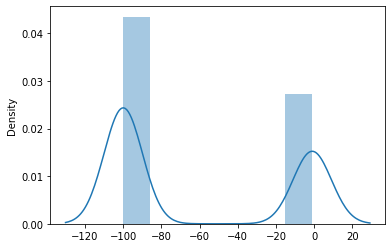

In [19]:
sns.distplot(img_transition_value)

<AxesSubplot:>

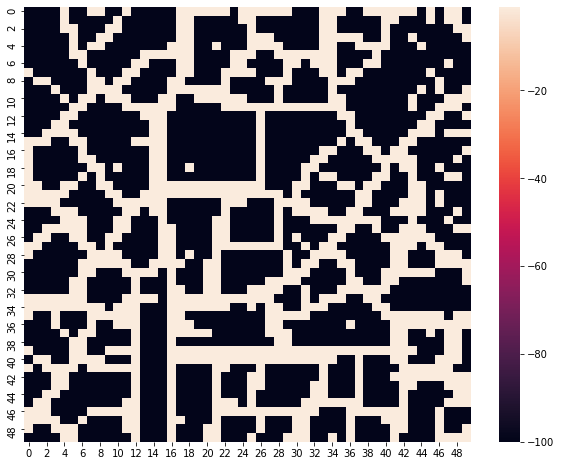

In [20]:
plt.figure(figsize=(10,8))  # without dialation
sns.heatmap(img_transition_value)

<AxesSubplot:>

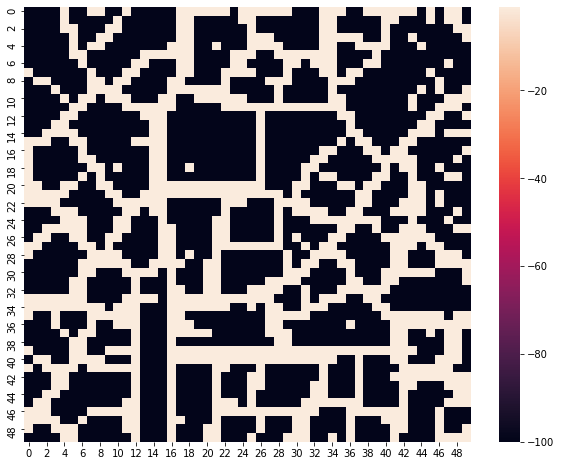

In [21]:
plt.figure(figsize=(10,8))  # without dialation seems better
sns.heatmap(img_transition_value)

# MAIN Function

In [22]:
img = cv2.imread("img4.jpg")[:size,:size,:]    #[:1000,:1000,:]
def Calculate_transition_matrix(img):
    global width
    global size
    mean_img = img.copy()
    img_transition_value = np.zeros((size//width,size//width))
    for i in range(0,size,width):
        for j in range(0,size,width):
            # got all the points
            pixel_value = np.mean(img[i:i+width,j:j+width,:])
            if pixel_value >210:              #200 didn't work
                mean_img[i:i+width,j:j+width,:] = 250
            else:
                mean_img[i:i+width,j:j+width,:] = 0 #pixel_value
    #kernel = np.ones((5,5), np.uint8)
    #img_dilation = cv2.dilate(mean_img, kernel, iterations=1) 
    img_dilation = mean_img.copy()
    img_transition_value=np.where(img_dilation<230,0,255) # 230
    #cv2.imwrite("dilated_5_2.jpg",img_transition_value)  # final image look BGR looks black and white
    img_transition_value=img_transition_value[::width,::width,0]
    img_transition_value=np.where(img_transition_value<120,-80,-1) # 230 
    return img_transition_value

In [23]:
def Sweep(Value, Policy,terminators,transition_value):
    # create transition matrix globally that is not possible since we will create dynamic wall
    New_Value = Value.copy()
    delta = 0
    x,y = Value.shape
    for i in range(x):  # x
        left = 0
        right = 0
        top = 0
        bottom = 0
        for j in range(y):  # y
            # (i,j)  
            if (i,j) in terminators:
                pass
            else:
                same= Value[i,j]
                if i==0:
                    left = same
                else:
                    left = Value[i-1,j]
                if i==x-1:
                    right= same
                else:
                    right = Value[i+1,j]
                if j==0:
                    top= same
                else:
                    top = Value[i,j-1]
                if j==y-1:
                    bottom= same
                else:
                    bottom = Value[i ,j+1]
#                 if (i,j) in red:
#                     transition_reward = -10
#                 else:
#                     transition_reward = -1
                transition_reward = transition_value[i,j]
                total_value = Policy[(y)*i+j,0]*(transition_reward+left) + Policy[(y)*i+j,1]*(transition_reward+right) + Policy[(y)*i+j,2]*(transition_reward+top) + Policy[(y)*i+j,3]*(transition_reward+bottom)
                #print(total_value, New_Value[i,j])
                delta = max(delta, np.abs(total_value- Value[i,j]))
                New_Value[i,j] = total_value    
    #print("Sweep")
    return New_Value, delta

In [24]:
def Improve_Policy(Value, Policy):
    New_Policy = Policy.copy()
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    x,y = Value.shape
    for i in range(x):
        for j in range(y):  # y
            # (i,j)  
            left = 0
            right = 0
            top = 0
            bottom = 0
            same= Value[i,j]
            if i==0:
                left = same
            else:
                left = Value[i-1,j]
            if i==x-1:
                right= same
            else:
                right = Value[i+1,j]
            if j==0:
                top= same
            else:
                top = Value[i,j-1]
            if j==y-1:
                bottom= same
            else:
                bottom = Value[i ,j+1]
            my_list = [left,right, top,bottom]
            max_val = max(my_list)
            my_list = np.array(my_list)
            my_list = (my_list==max_val).astype(int)
            my_list = my_list/np.sum(my_list)
            New_Policy[(y)*i+j,:] = my_list
    #print("Improve_Policy")
    return New_Policy

In [25]:
call =0
def Evaluate_value(Value, Policy,theta,terminators,transition_value):
    Policy = Policy.copy()
    theta = theta
    terminators = terminators.copy()
    Policy = Policy.copy()
    global call
    call += 1
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    delta = float(np.inf)
    while delta> theta:
        delta = 0
        Value, delta = Sweep(Value, Policy, terminators,transition_value)
        #print(delta,theta, delta>theta)
    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    New_Policy = Improve_Policy(Value, Policy)
    if np.all(Policy==New_Policy):
        #print("Evaluate_value_")
        return Value, New_Policy, theta, terminators
    else:
        # repeat
        #print("Evaluate_value")
        return Evaluate_value(Value, New_Policy,theta, terminators,transition_value)

In [26]:
def Calculate_optimal(Grid_shape,no_actions, terminators,img_mask):
    global img
    x,y = Grid_shape
    State_action = np.ones((x*y,no_actions))*(1/no_actions)  #######  L     R     T     B
    Value = np.zeros((x,y))
    theta = 0.001
    
    transition_value = Calculate_transition_matrix(img_mask)
#     Value[17,24] = 30
#     terminators.append((17,24))
#     print("terminators",terminators)
    
    #transition_value[25,25] = 1
    #img[25*width-10-70:25*width+10-70,25*width-10:25*width+10,:] = 0
    #Value[HOME] = 0 # No matter how low you make it (-4000) this will become optimal point because everywhere else value is calculated
    l,m,th,tr =Evaluate_value(Value,State_action,60, terminators, transition_value) #l:- value function m:- optimal action
    #print("Calculate_optimal")         # 80 for -100 , 9.5 for -10 , 100 for -1000  60 for -80
    return l,m              

In [27]:
optimal_path = np.zeros((50,50))
collect_pts = []
def trace_path(optimal_value, optimal_policy,initial_pt):
    global optimal_path
    global width 
    global collect_pts
    x,y = initial_pt  # 48,25
    if (x,y) in HOME: #== HOME:
        # stop
        print("REACHED HOME")
        return
    if x<0 or x>= 50 or y<0 or y>= 50:
        # stop execution
        return
    # Plot
    a1 = width*y
    b1 = width*x
    a2 = width*y + width
    b2 = width*x + width
    
    #
    policy_index = x*50 + y
    l,r,t,b = optimal_policy[policy_index,:]
    max_index = (l,r,t,b).index(max(l,r,t,b)) # pick the first optimal index
    indexes = [i for i,j in enumerate((l,r,t,b)) if j==max(l,r,t,b)]
    max_index = random.choice(indexes)
    if max_index==0:
        # left
        #cv2.circle(img, ((a1+a2)//2,(b1+b2)//2),3,(0,250,0),2)
        #cv2.line(img,((a1+a2)//2,b1),((a1+a2)//2,b2), (0,0,0),3)
        trace_path(optimal_value, optimal_policy,(x-1,y))
        optimal_path[x-1:x,y:y+1] += 1
    elif max_index==1:
        # right
        #cv2.circle(img, ((a1+a2)//2,(b1+b2)//2),3,(0,250,0),2)
        #cv2.line(img,((a1+a2)//2,b1),((a1+a2)//2,b2), (0,0,0),3)
        trace_path(optimal_value, optimal_policy,(x,y+1))
        optimal_path[x:x+1,y+1:y+2] += 1
    elif max_index==2:
        # top
        #cv2.circle(img, ((a1+a2)//2,(b1+b2)//2),3,(0,250,0),2)
        #cv2.line(img,(a1,(b1+b2)//2),(a2,(b1+b2)//2), (0,0,0),3)
        trace_path(optimal_value, optimal_policy,(x,y-1))
        optimal_path[x:x+1,y-1:y] += 1
    elif max_index==3:
        # bottom 
        #cv2.circle(img, ((a1+a2)//2,(b1+b2)//2),3,(0,250,0),2)
        #cv2.line(img,(a1,(b1+b2)//2),(a2,(b1+b2)//2), (0,0,0),3)
        trace_path(optimal_value, optimal_policy,(x,y+1))
        optimal_path[x:x+1,y+1:y+2] += 1
    else:
        print("ERROR")

In [28]:
def draw_path():
    global optimal_path
    global img
    global width
    global size
    print('calculating')
    Full_matrix = (np.repeat(np.repeat(optimal_path,width,axis=0),width,axis=1)*500).astype(int)
    img = ((np.clip((img - Full_matrix.reshape(size,size,1)).astype(int),0,255)).astype(int)).astype(np.uint8)

In [29]:
A = np.array([[0,3],[5,0]])
A

array([[0, 3],
       [5, 0]])

In [30]:
np.repeat(np.repeat(A,3,axis=0),3,axis=1)

array([[0, 0, 0, 3, 3, 3],
       [0, 0, 0, 3, 3, 3],
       [0, 0, 0, 3, 3, 3],
       [5, 5, 5, 0, 0, 0],
       [5, 5, 5, 0, 0, 0],
       [5, 5, 5, 0, 0, 0]])

In [31]:
def smart_trace():
    global optimal_policy
    global width 
    global size
    T =np.argmax(optimal_policy, axis=1)
    x_dict = {0:-1,1:1,2:0,3:0}
    y_dict = {0:0,1:0,2:-1,3:1}
    x_axis=np.vectorize(x_dict.get)(T)
    y_axis=np.vectorize(y_dict.get)(T)
    #f_x ,f_y = HOME
    in_x, in_y = AGENT
    
    while (in_x,in_y) not in HOME: #in_x != f_x or in_y != f_y:
        m = width*in_x
        l = width*in_y
        cv2.circle(img, ((2*l+width)//2,(2*m+width)//2),5,(0,255,0),5)
        new_loc = 50*in_x + in_y
        in_x += x_axis[new_loc]
        in_y += y_axis[new_loc]
        #print("action",x_axis[new_loc],y_axis[new_loc])
        #print("reached",in_x,in_y)
        if l<0 or l>999 or m <0 or m>999:
            print('Not found',(2*l + width),(2*m + width))
            return
    print("REACHED_DEST",in_x,in_y)

HOME location
[(12, 14)]
HOME location
[(12, 14), (11, 34)]
HOME location
[(12, 14), (11, 34), (36, 42)]
AGENT location
[36, 12]
terminating locations
[(12, 14), (11, 34), (36, 42)]

Calculating...
OPTIMAL POLICY
[[-421. -341. -261. ... -184. -185. -265.]
 [-420. -340. -260. ... -185. -186. -266.]
 [-419. -339. -259. ... -265. -187. -188.]
 ...
 [ -51.  -50.  -49. ... -176. -175. -176.]
 [ -52. -130. -129. ... -179. -182. -104.]
 [-132. -210. -209. ... -101. -102. -103.]]
REACHED_DEST 12 14


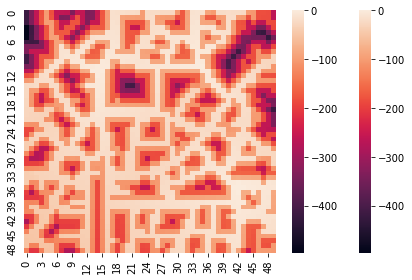


Calculating...
OPTIMAL POLICY
[[-421. -341. -261. ... -184. -185. -265.]
 [-420. -340. -260. ... -185. -186. -266.]
 [-419. -339. -259. ... -265. -187. -188.]
 ...
 [ -71.  -70.  -69. ... -176. -175. -176.]
 [ -72. -150. -149. ... -179. -182. -104.]
 [-152. -230. -229. ... -101. -102. -103.]]
REACHED_DEST 12 14


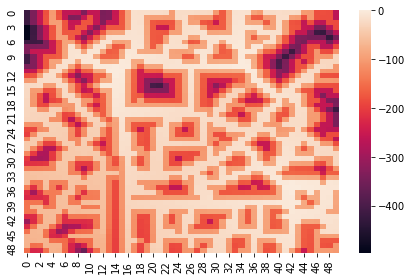


Calculating...
OPTIMAL POLICY
[[-435. -355. -275. ... -184. -185. -265.]
 [-434. -354. -274. ... -185. -186. -266.]
 [-433. -353. -273. ... -265. -187. -188.]
 ...
 [-132. -131. -130. ... -176. -175. -176.]
 [-133. -211. -210. ... -179. -182. -104.]
 [-213. -291. -290. ... -101. -102. -103.]]
REACHED_DEST 12 14


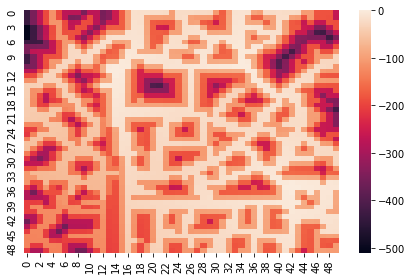


Calculating...
OPTIMAL POLICY
[[-527. -447. -367. ... -184. -185. -265.]
 [-526. -446. -366. ... -185. -186. -266.]
 [-525. -445. -365. ... -265. -187. -188.]
 ...
 [-132. -131. -130. ... -176. -175. -176.]
 [-133. -211. -210. ... -179. -182. -104.]
 [-213. -291. -290. ... -101. -102. -103.]]
REACHED_DEST 12 14


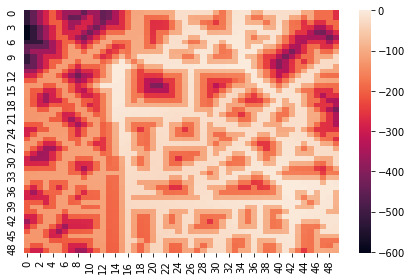


Calculating...
OPTIMAL POLICY
[[-448.  -368.  -288.  ... -184.  -185.  -265. ]
 [-447.  -367.  -287.  ... -185.  -186.  -266. ]
 [-446.  -366.  -286.  ... -265.  -187.  -188. ]
 ...
 [-145.5  -97.   -96.  ... -176.  -175.  -176. ]
 [-176.  -224.5 -176.  ... -179.  -182.  -104. ]
 [-274.  -334.  -303.5 ... -101.  -102.  -103. ]]
REACHED_DEST 11 34


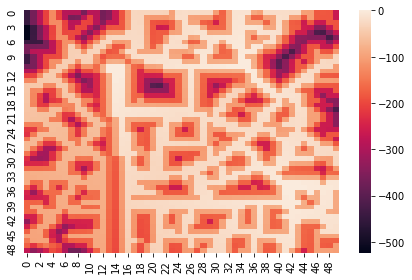


Calculating...
OPTIMAL POLICY
[[-605. -525. -445. ... -184. -185. -265.]
 [-604. -524. -444. ... -185. -186. -266.]
 [-603. -523. -443. ... -265. -187. -188.]
 ...
 [-209. -208. -207. ... -176. -175. -176.]
 [-210. -288. -287. ... -179. -182. -104.]
 [-290. -368. -367. ... -101. -102. -103.]]
REACHED_DEST 12 14


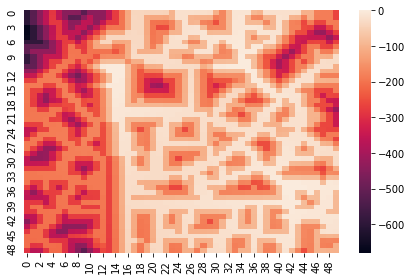

In [46]:
drag = False
HOME =  [] #0
AGENT = 0
Grid_shape = (50,50) #(100,100) # later set automatically
no_actions = 4
terminatos = []
optimal_path = np.zeros((50,50))
width = 20 #20
size =  1000 #1000

# PATH
img_mask = cv2.imread("dilated_5_2.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
img = cv2.imread("img4.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
#img = cv2.cvtColor(img, cv2.Color_BGR2RGB)
cv2.namedWindow("window") #,cv2.WINDOW_NORMAL)
#img = cv2.resize(img, (500, 500)) 
optimal_value = 0
state =0 
can_initial_reward = -1
"""
state:click
0       No
1       set home
2       set car
3       start optimizing
4       start game
5       loop----in 5
"""



def draw(event, x, y, flag, param):
    global drag
    global state
    global HOME
    global AGENT
    global optimal_value
    global img
    global Grid_shape
    global no_action
    global terminators
    global optimal_path
    global width
    global size
    global optimal_policy
    
    if event == cv2.EVENT_FLAG_LBUTTON:
        drag = True
    if event == cv2.EVENT_LBUTTONUP:
        drag=False
        #cv2.circle(img, (x,y),20,(0,0,0),3)
        if state == 0:
            # draw home
            temp = (y//width,x//width)
            HOME.append(temp)
            print("HOME location")
            print(HOME)
            cv2.rectangle(img, (x+width,y-width),(x-width,y+width),(0,0,250),3)
            #state =1
        elif state == 1:
            # draw car
            AGENT = [y//width,x//width]
            print("AGENT location")
            print(AGENT)
            cv2.rectangle(img, (x+width,y-width),(x-width,y+width),(250,0,0),3)
            #state = 2
        elif state == 2:
            state = 3
            # show color
            terminators = HOME
            print("terminating locations")
            print(terminators)
            
            img_mask = cv2.imread("img4.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg # this is the fresh copy not affected by any thing 
            print()
            print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            print('OPTIMAL POLICY')
            print(optimal_value)
            l,m = optimal_value.shape  # (100,100)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            
            # Method1 
            smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
            sns.heatmap(optimal_value)
            g2=sns.heatmap(optimal_value)
            g2.tick_params(left=False)  # remove the ticks  #tick_params(left=False)  # remove the ticks

            plt.tight_layout()
            plt.show()
            
            # Method2
            """
            trace_path(optimal_value,optimal_policy,AGENT)
            draw_path()
            
            f, axes = plt.subplots(1, 2)
            sns.heatmap(   data=optimal_value,   ax=axes[0])
            sns.heatmap(  data=optimal_path,   ax=axes[1])
            """
        elif state == 3:
            #start game
            pass
        elif state == 4:
            # # New map img
            state=5
            img_mask = img.copy()   # img4.jpg # this is the fresh copy not affected by any thing
            for H in HOME:
                cv2.rectangle(img, (H[1]*width+width,H[0]*width-width),(H[1]*width-width,H[0]*width+width),(0,0,250),3)
            cv2.rectangle(img, (AGENT[1]*width+width,AGENT[0]*width-width),(AGENT[1]*width-width,AGENT[0]*width+width),(250,0,0),3)
            print()
            print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            print('OPTIMAL POLICY')
            print(optimal_value)
            l,m = optimal_value.shape  # (100,100)
            
            # Method1
            smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
            g2=sns.heatmap(optimal_value)
            g2.tick_params(left=False)  # remove the ticks

            plt.tight_layout()
            plt.show()
            
            # Method2 [it was making linear search which was computationally heavy]
            """
            #trace_path(optimal_value,optimal_policy,AGENT)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            #draw_path()
            
            #f, axes = plt.subplots(1, 2)
            #sns.heatmap(  data=optimal_value, ax=axes[0])
            #sns.heatmap(  data=optimal_path,  ax=axes[1])
            """

            
            
    if event == cv2.EVENT_MOUSEMOVE:

        if drag ==True:
            #state=4
            cv2.circle(img, (x,y),5,(0,0,0),15)
            #cv2.circle(img, (x,y),2,(0,0,0),4)
            

cv2.setMouseCallback("window", draw)

while True:
    cv2.imshow("window", img)
    key_val = cv2.waitKey(1)
    if key_val == ord("d"):
        # time to create new image
        optimal_path = np.zeros((50,50))
        img = cv2.imread("img4.jpg")[:size,:size,:]
    if key_val == ord("c"):
        state = 0
        AGENT = 0
        HOME = []
        optimal_path = np.zeros((50,50))
        img = cv2.imread("img4.jpg")[:size,:size,:]
    if key_val == ord("a") and state==0:
        state = 1 # click to set agent
    if key_val == ord("p") and state == 1:
        state = 2 # click to play
    if key_val == ord("p") and (state == 3 or state == 5):
        state = 4
    if key_val == 27:
        break
cv2.destroyAllWindows()
#cv2.imwrite("final_save.jpg",img)

In [47]:
for H in HOME:
    print(optimal_value[H])  # terminating position has fixed q value and not the fixed transition value

0.0
0.0
0.0


In [48]:
HOME

[(12, 14), (11, 34), (36, 42)]

<AxesSubplot:>

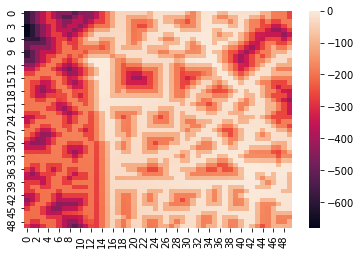

In [49]:
sns.heatmap(optimal_value)

In [50]:
new_value = (optimal_value-np.min(optimal_value))/(np.max(optimal_value)-np.min(optimal_value))

In [51]:
pd.DataFrame(new_value).iplot(kind='surface',)

In [31]:
# In figure we see (17,24) creates a spike which makes it hard to leave once an agent enters it.
# Hence setting some reward of 30 and HOME 55 didn't help!

# BUT setting multiple HOME solved the problem